In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./simulation_performance_summary.csv')

In [3]:
df.head()

,Algorithm,Params,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes,Timestamp,Seed,TotalSimTime,NumInitialObstacles,AgentSpeed,LiDAR_Range,PaddingCells
0,DBSCAN,"{'eps': 1, 'min_samples': 3}, YScl:0.2",3D_IOU,10,6,15,0.625,0.40,0.488,25,16,2025-05-22 02:13:05,1,20.0,25,20,15,1
1,KMEANS,"{'n_clusters': 25, 'random_state': 1, 'n_init'...",3D_IOU,10,14,15,0.417,0.40,0.408,25,24,2025-05-22 02:13:05,1,20.0,25,20,15,1
2,GMM,"{'n_components': 25, 'covariance_type': 'full'...",3D_IOU,10,9,15,0.526,0.40,0.455,25,19,2025-05-22 02:13:05,1,20.0,25,20,15,1
3,DBSCAN,"{'eps': 1, 'min_samples': 3}, YScl:0.2",2D_CENTER_IN_GT_AREA,15,1,10,0.938,0.60,0.732,25,16,2025-05-22 02:13:05,1,20.0,25,20,15,1
4,KMEANS,"{'n_clusters': 25, 'random_state': 1, 'n_init'...",2D_CENTER_IN_GT_AREA,16,8,9,0.667,0.64,0.653,25,24,2025-05-22 02:13:05,1,20.0,25,20,15,1


In [4]:
df1 = df[['Algorithm','EvaluationMethod','TP','FP','FN','Precision','Recall','F1-Score','GT_Relevant','Predicted_Boxes']]

In [5]:
df1

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes
0,DBSCAN,3D_IOU,10,6,15,0.625,0.400,0.488,25,16
1,KMEANS,3D_IOU,10,14,15,0.417,0.400,0.408,25,24
2,GMM,3D_IOU,10,9,15,0.526,0.400,0.455,25,19
3,DBSCAN,2D_CENTER_IN_GT_AREA,15,1,10,0.938,0.600,0.732,25,16
4,KMEANS,2D_CENTER_IN_GT_AREA,16,8,9,0.667,0.640,0.653,25,24
...,...,...,...,...,...,...,...,...,...,...
418,KMEANS,2D_CENTER_IN_GT_AREA,31,20,82,0.608,0.274,0.378,113,51
419,GMM,2D_CENTER_IN_GT_AREA,31,18,82,0.633,0.274,0.383,113,49
420,DBSCAN,2D_AREA_OVERLAP_RATIO,38,10,75,0.792,0.336,0.472,113,48
421,KMEANS,2D_AREA_OVERLAP_RATIO,46,5,67,0.902,0.407,0.561,113,51


In [6]:
performance_summary = df.groupby('EvaluationMethod').agg(
    Avg_F1_Score=('F1-Score', 'mean'),
    Avg_Precision=('Precision', 'mean'),
    Avg_Recall=('Recall', 'mean')
).sort_values(by='Avg_F1_Score', ascending=False) # F1-Score 기준으로 정렬 (다른 기준으로 변경 가능)

print("--- EvaluationMethod별 평균 성능 지표 (F1, Precision, Recall) ---")
print(performance_summary)
print("\n")

--- EvaluationMethod별 평균 성능 지표 (F1, Precision, Recall) ---
                       Avg_F1_Score  Avg_Precision  Avg_Recall
EvaluationMethod                                              
2D_AREA_OVERLAP_RATIO      0.735979       0.891518    0.645199
2D_CENTER_IN_GT_AREA       0.652943       0.794965    0.572801
3D_IOU                     0.369184       0.434099    0.326730




In [7]:
display(performance_summary)

# 2D_AREA_OVERLAP_RATIO가 정확히 나와.

,Avg_F1_Score,Avg_Precision,Avg_Recall
EvaluationMethod,,,
2D_AREA_OVERLAP_RATIO,0.735979,0.891518,0.645199
2D_CENTER_IN_GT_AREA,0.652943,0.794965,0.572801
3D_IOU,0.369184,0.434099,0.326730


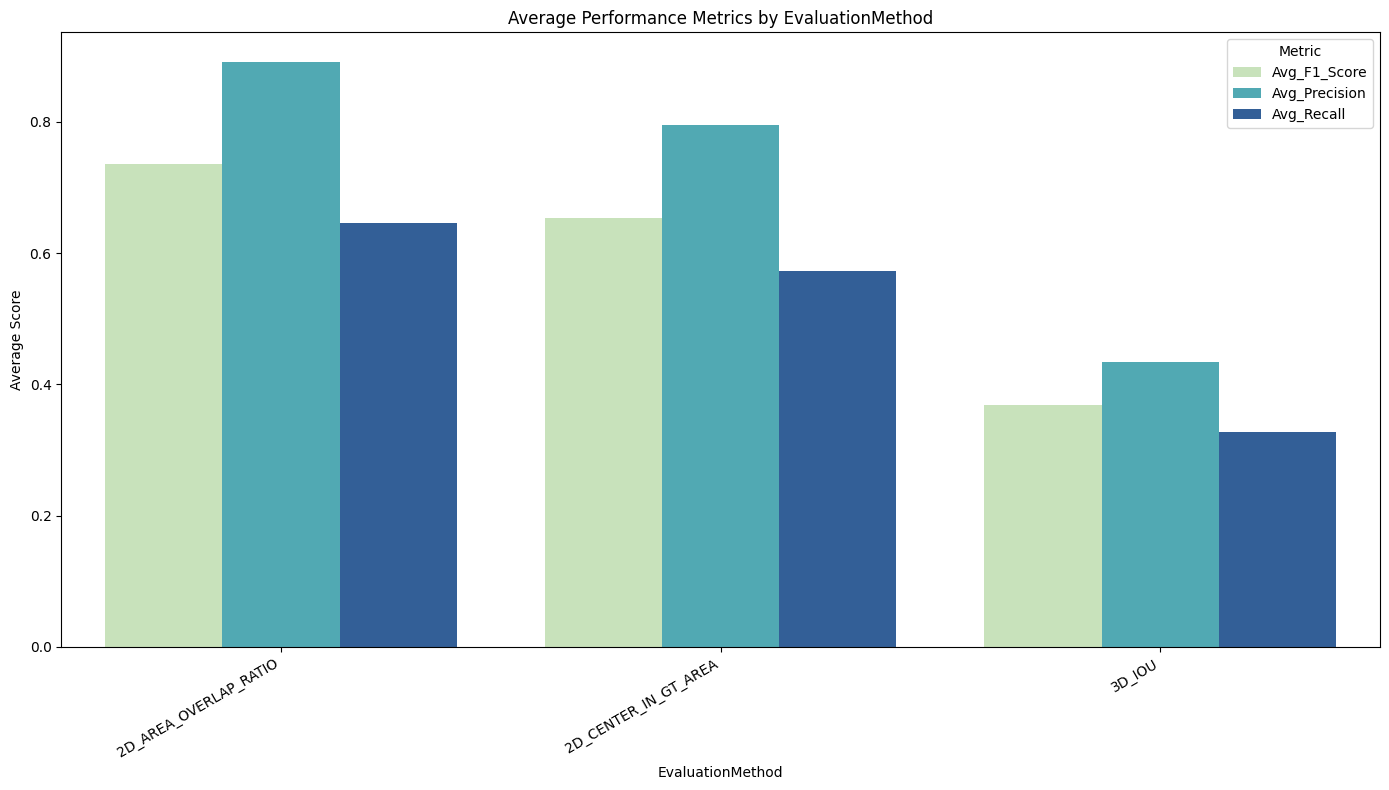

In [8]:
# 시각화를 위해 데이터프레임 형태를 살짝 변경 (melt 사용)
performance_summary_reset = performance_summary.reset_index() # EvaluationMethod를 컬럼으로 변경
performance_melted = performance_summary_reset.melt(
    id_vars='EvaluationMethod', # 기준이 될 컬럼
    value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'], # 값으로 사용할 컬럼들
    var_name='Metric', # 새로운 컬럼명 (지표 종류)
    value_name='Score'  # 새로운 컬럼명 (지표 값)
)

plt.figure(figsize=(14, 8))
sns.barplot(x='EvaluationMethod', y='Score', hue='Metric', data=performance_melted, palette='YlGnBu',
            order=performance_summary.index) # 정렬 순서 유지
plt.title('Average Performance Metrics by EvaluationMethod')
plt.xlabel('EvaluationMethod')
plt.ylabel('Average Score')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [9]:
# '2D_AREA_OVERLAP_RATIO' 평가 방법에 해당하는 데이터만 필터링
df_target_method = df1[df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].copy()

In [ ]:
df_target_method

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes
6,DBSCAN,2D_AREA_OVERLAP_RATIO,16,0,9,1.000,0.640,0.780,25,16
7,KMEANS,2D_AREA_OVERLAP_RATIO,19,5,6,0.792,0.760,0.776,25,24
8,GMM,2D_AREA_OVERLAP_RATIO,17,2,8,0.895,0.680,0.773,25,19
15,DBSCAN,2D_AREA_OVERLAP_RATIO,20,0,5,1.000,0.800,0.889,25,20
16,KMEANS,2D_AREA_OVERLAP_RATIO,20,5,5,0.800,0.800,0.800,25,25
...,...,...,...,...,...,...,...,...,...,...
412,KMEANS,2D_AREA_OVERLAP_RATIO,47,10,32,0.825,0.595,0.691,79,57
413,GMM,2D_AREA_OVERLAP_RATIO,42,1,37,0.977,0.532,0.689,79,43
420,DBSCAN,2D_AREA_OVERLAP_RATIO,38,10,75,0.792,0.336,0.472,113,48
421,KMEANS,2D_AREA_OVERLAP_RATIO,46,5,67,0.902,0.407,0.561,113,51


In [ ]:
df1[(df1['Algorithm'] == 'DBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes
6,DBSCAN,2D_AREA_OVERLAP_RATIO,16,0,9,1.000,0.640,0.780,25,16
15,DBSCAN,2D_AREA_OVERLAP_RATIO,20,0,5,1.000,0.800,0.889,25,20
24,DBSCAN,2D_AREA_OVERLAP_RATIO,23,1,2,0.958,0.920,0.939,25,24
33,DBSCAN,2D_AREA_OVERLAP_RATIO,22,2,3,0.917,0.880,0.898,25,24
42,DBSCAN,2D_AREA_OVERLAP_RATIO,16,1,9,0.941,0.640,0.762,25,17
51,DBSCAN,2D_AREA_OVERLAP_RATIO,20,0,5,1.000,0.800,0.889,25,20
60,DBSCAN,2D_AREA_OVERLAP_RATIO,18,2,7,0.900,0.720,0.800,25,20
69,DBSCAN,2D_AREA_OVERLAP_RATIO,21,2,14,0.913,0.600,0.724,35,23
78,DBSCAN,2D_AREA_OVERLAP_RATIO,23,0,15,1.000,0.605,0.754,38,23
87,DBSCAN,2D_AREA_OVERLAP_RATIO,19,2,17,0.905,0.528,0.667,36,21


In [17]:
df2 = df1.copy

In [ ]:
df2[]

In [11]:
if df_target_method.empty:
    print("데이터프레임에 '2D_AREA_OVERLAP_RATIO' 평가 방법에 대한 데이터가 없습니다.")
else:
    print("--- '2D_AREA_OVERLAP_RATIO' 평가 방법 데이터 ---")
    print(df_target_method)
    print("\n")

    # 2. 필터링된 데이터 내에서 Algorithm별 평균 성능 지표 계산
    # (GT_Relevant 값도 함께 고려하여 그룹화. 만약 이 평가방법 내 GT_Relevant가 항상 같다면 Algorithm만으로 그룹화해도 무방)
    algo_performance = df_target_method.groupby(['Algorithm', 'GT_Relevant']).agg(
        Avg_F1_Score=('F1-Score', 'mean'),
        Avg_Precision=('Precision', 'mean'),
        Avg_Recall=('Recall', 'mean'),
        Count=('Algorithm', 'size') # 각 그룹의 데이터 개수 확인
    ).sort_values(by='Avg_F1_Score', ascending=False)

    # 만약 GT_Relevant 값이 이 평가 방법 내에서 항상 동일하다면, 아래와 같이 Algorithm만으로 그룹화 가능
    # algo_performance_simple = df_target_method.groupby('Algorithm').agg(
    #     Avg_F1_Score=('F1-Score', 'mean'),
    #     Avg_Precision=('Precision', 'mean'),
    #     Avg_Recall=('Recall', 'mean')
    # ).sort_values(by='Avg_F1_Score', ascending=False)
    # print("--- '2D_AREA_OVERLAP_RATIO' 내 Algorithm별 평균 성능 (단순) ---")
    # print(algo_performance_simple)
    # print("\n")


    print(f"--- '2D_AREA_OVERLAP_RATIO' 내 Algorithm별 평균 성능 (GT_Relevant 고려) ---")
    display(algo_performance)
    print("\n")

   

--- '2D_AREA_OVERLAP_RATIO' 평가 방법 데이터 ---
    Algorithm       EvaluationMethod  TP  FP  FN  Precision  Recall  F1-Score  \
6      DBSCAN  2D_AREA_OVERLAP_RATIO  16   0   9      1.000   0.640     0.780   
7      KMEANS  2D_AREA_OVERLAP_RATIO  19   5   6      0.792   0.760     0.776   
8         GMM  2D_AREA_OVERLAP_RATIO  17   2   8      0.895   0.680     0.773   
15     DBSCAN  2D_AREA_OVERLAP_RATIO  20   0   5      1.000   0.800     0.889   
16     KMEANS  2D_AREA_OVERLAP_RATIO  20   5   5      0.800   0.800     0.800   
..        ...                    ...  ..  ..  ..        ...     ...       ...   
412    KMEANS  2D_AREA_OVERLAP_RATIO  47  10  32      0.825   0.595     0.691   
413       GMM  2D_AREA_OVERLAP_RATIO  42   1  37      0.977   0.532     0.689   
420    DBSCAN  2D_AREA_OVERLAP_RATIO  38  10  75      0.792   0.336     0.472   
421    KMEANS  2D_AREA_OVERLAP_RATIO  46   5  67      0.902   0.407     0.561   
422       GMM  2D_AREA_OVERLAP_RATIO  45   4  68      0.918   0.398

Avg_F1_Score  Avg_Precision  Avg_Recall  Count
Algorithm GT_Relevant                                                
DBSCAN    24               0.857000       1.000000    0.750000      1
KMEANS    24               0.833000       0.833000    0.833000      1
GMM       60               0.830000       0.938200    0.746600      5
DBSCAN    25               0.810583       0.941208    0.716667     24
          59               0.808000       1.000000    0.678000      1
KMEANS    25               0.806542       0.845000    0.773333     24
          60               0.805400       0.840600    0.773200      5
GMM       24               0.800000       0.857000    0.750000      1
DBSCAN    60               0.799600       0.928200    0.703200      5
GMM       59               0.796000       0.878000    0.729000      1
          25               0.794792       0.919083    0.705000     24
KMEANS    59               0.772000       0.800000    0.746000      1
DBSCAN    38               0.754000       1.000000    0.605000      1
KMEANS    39               0.721000       1.000000    0.564000      1
          79               0.719500       0.883500    0.607500      2
GMM       79               0.719500       0.978500    0.570000      2
DBSCAN    39               0.708000       0.885000    0.590000      1
GMM       36               0.705000       0.929000    0.569500      2
KMEANS    35               0.702000       0.909333    0.571333      3
          57               0.699000       0.783000    0.632000      1
DBSCAN    36               0.695500       0.930000    0.555500      2
KMEANS    36               0.695000       0.859000    0.583500      2
GMM       57               0.681000       0.865000    0.561000      1
DBSCAN    57               0.674000       0.938000    0.526000      1
GMM       35               0.674000       0.946333    0.524000      3
DBSCAN    89               0.667000       0.939000    0.517000      1
GMM       89               0.667000       0.939000    0.517000      1
KMEANS    38               0.667000       0.909000    0.526000      1
GMM       39               0.667000       0.952000    0.513000      1
DBSCAN    79               0.666500       0.915000    0.525000      2
GMM       38               0.655000       0.950000    0.500000      1
KMEANS    89               0.653000       0.855000    0.528000      1
DBSCAN    35               0.644667       0.915667    0.504667      3
KMEANS    113              0.561000       0.902000    0.407000      1
GMM       113              0.556000       0.918000    0.398000      1
KMEANS    78               0.520500       0.696000    0.416500      2
GMM       78               0.518000       0.805500    0.384500      2
DBSCAN    78               0.484500       0.870000    0.339500      2
          19               0.480000       1.000000    0.316000      1
          113              0.472000       0.792000    0.336000      1
KMEANS    19               0.414000       0.600000    0.316000      1
GMM       19               0.414000       0.600000    0.316000      1
DBSCAN    33               0.111000       0.667000    0.061000      1
GMM       33               0.059000       1.000000    0.030000      1
KMEANS    33               0.056000       0.333000    0.030000      1

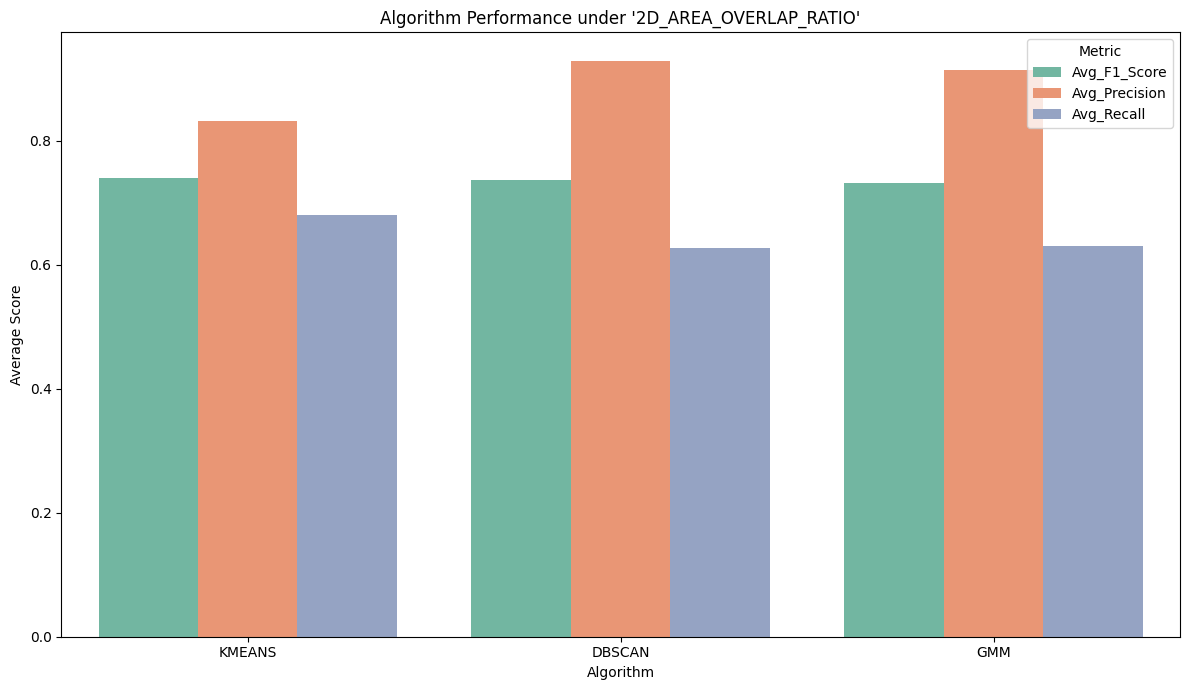

In [12]:
 # 3. 시각화: Algorithm별 성능 비교 (그룹형 막대 차트)
    # 시각화를 위해 GT_Relevant를 제외하고 Algorithm 만으로 그룹화한 데이터를 사용하거나,
    # GT_Relevant 별로 구분해서 표시할 수 있습니다.
    # 여기서는 Algorithm 만으로 그룹화하여 시각화합니다. (위의 algo_performance_simple과 유사)
    
    # 시각화를 위한 데이터 준비 (Algorithm별 평균)
algo_perf_for_plot = df_target_method.groupby('Algorithm').agg(
    Avg_F1_Score=('F1-Score', 'mean'),
    Avg_Precision=('Precision', 'mean'),
    Avg_Recall=('Recall', 'mean')
).reset_index() # Algorithm을 컬럼으로 변경

if not algo_perf_for_plot.empty:
    algo_perf_melted = algo_perf_for_plot.melt(
        id_vars='Algorithm',
        value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'],
        var_name='Metric',
        value_name='Score'
    )

    plt.figure(figsize=(12, 7))
    # F1-Score가 높은 순으로 알고리즘 정렬
    algo_order = algo_perf_for_plot.sort_values('Avg_F1_Score', ascending=False)['Algorithm']
    sns.barplot(x='Algorithm', y='Score', hue='Metric', data=algo_perf_melted, palette='Set2', order=algo_order)
    plt.title("Algorithm Performance under '2D_AREA_OVERLAP_RATIO'")
    plt.xlabel('Algorithm')
    plt.ylabel('Average Score')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()
else:
    print("시각화할 데이터가 없습니다 (필터링된 데이터가 비어있을 수 있습니다).")


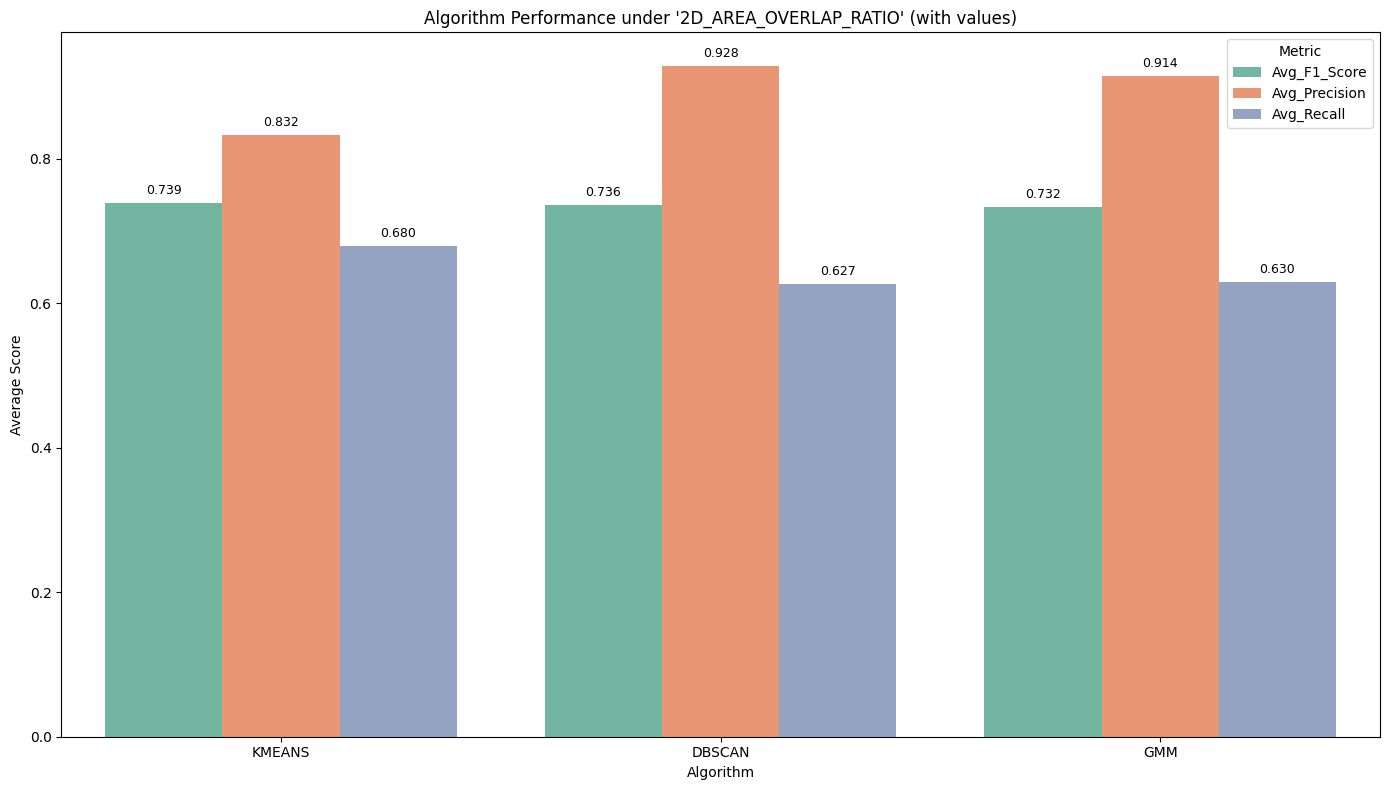

In [13]:
# '2D_AREA_OVERLAP_RATIO' 평가 방법에 해당하는 데이터만 필터링
df_target_method = df[df['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].copy()

if df_target_method.empty:
    print("데이터프레임에 '2D_AREA_OVERLAP_RATIO' 평가 방법에 대한 데이터가 없습니다.")
else:
    # 시각화를 위한 데이터 준비 (Algorithm별 평균)
    algo_perf_for_plot = df_target_method.groupby('Algorithm').agg(
        Avg_F1_Score=('F1-Score', 'mean'),
        Avg_Precision=('Precision', 'mean'),
        Avg_Recall=('Recall', 'mean')
    ).reset_index()

    if not algo_perf_for_plot.empty:
        algo_perf_melted = algo_perf_for_plot.melt(
            id_vars='Algorithm',
            value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'],
            var_name='Metric',
            value_name='Score'
        )

        plt.figure(figsize=(14, 8)) # 차트 크기 약간 조정
        
        # F1-Score가 높은 순으로 알고리즘 정렬
        algo_order = algo_perf_for_plot.sort_values('Avg_F1_Score', ascending=False)['Algorithm']
        
        # 막대 그래프 생성 및 Axes 객체 저장
        ax = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=algo_perf_melted, palette='Set2', order=algo_order)

        # 각 막대 위에 수치 표시하는 부분 추가
        for p in ax.patches:
            # p.get_height()는 막대의 높이 (즉, 값)
            # p.get_x()는 막대의 x축 시작 위치
            # p.get_width()는 막대의 너비
            if p.get_height() > 0: # 높이가 0보다 큰 경우에만 표시 (음수 값 등 예외 처리)
                ax.annotate(f"{p.get_height():.3f}",  # 표시할 텍스트 (소수점 3자리까지)
                            (p.get_x() + p.get_width() / 2., p.get_height()),  # 텍스트 위치 (x, y) - 막대 중앙 상단
                            ha='center', va='center',  # 수평/수직 정렬
                            xytext=(0, 9),  # 텍스트 오프셋 (막대 상단에서 위로 9포인트)
                            textcoords='offset points',
                            fontsize=9) # 폰트 크기

        plt.title("Algorithm Performance under '2D_AREA_OVERLAP_RATIO' (with values)")
        plt.xlabel('Algorithm')
        plt.ylabel('Average Score')
        plt.legend(title='Metric', loc='upper right') # 범례 위치 (필요시 'best' 등으로 자동 조정)
        plt.tight_layout() # 레이아웃 자동 조정
        plt.show()
    else:
        print("시각화할 데이터가 없습니다 (필터링된 데이터가 비어있을 수 있습니다).")
